We will work again on the iris data set. The data have labels here, but we will check if unsupervised learning can make good guesses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
dataset = pd.read_csv('iris.csv')

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

In [3]:
dataset.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
26,5.0,3.4,1.6,0.4,setosa
73,6.1,2.8,4.7,1.2,versicolor
101,5.8,2.7,5.1,1.9,virginica
139,6.9,3.1,5.4,2.1,virginica


In [4]:
dataset['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


def plot_scatter(x,y,k=3):
    plt.figure(figsize=(10,6), dpi= 80)
    color_list = plt.cm.get_cmap('rainbow', k)
    
    plt.scatter(dataset[dataset['species'] == 'setosa'][x], dataset[dataset['species'] == 'setosa'][y],s = 40, color = color_list(0), alpha=0.7, lw=0, label='setosa')
    plt.scatter(dataset[dataset['species'] == 'versicolor'][x], dataset[dataset['species'] == 'versicolor'][y],s = 40, color = color_list(1), alpha=0.7, lw=0, label='versicolor')
    plt.scatter(dataset[dataset['species'] == 'virginica'][x], dataset[dataset['species'] == 'virginica'][y], s = 40, color = color_list(2), alpha=0.7, lw=0, label='virginica')
    plt.title('Scatter plot of '+x+' vs '+y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

def train_plot_kmeans(X,k=3):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    plt.figure(figsize=(10,6), dpi= 80)
    color_list = plt.cm.get_cmap('rainbow', k)

    # Plot data points with color corresponding to their cluster attribution
    for i in range(k):
        plt.scatter(X.iloc[y_pred == i, 0], X.iloc[y_pred == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

    plt.title('k-Means cluster')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.legend()
    plt.show()

def train_plot_agglomerative(X,k=3):
    hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
    y_hc = hc.fit_predict(X)
    plt.figure(figsize=(10,6), dpi= 80)
    color_list = plt.cm.get_cmap('rainbow', k)

    # Plot data points with color corresponding to their cluster attribution
    for i in range(k):
        plt.scatter(X.iloc[y_hc == i, 0], X.iloc[y_hc == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

    plt.title('Agglomerative cluster')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.legend()
    plt.show()

<h4>1) Plotting sepal length vs sepal width</h4>

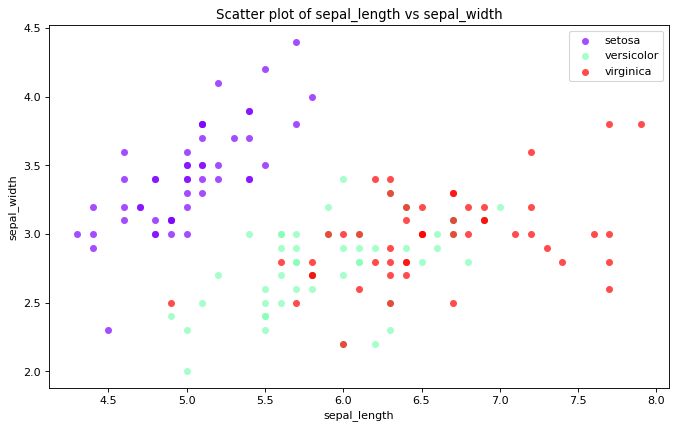

In [6]:
plot_scatter('sepal_length','sepal_width')

<div style="height:20px;text-align_center"><hr/></div>

<h4>2) Training and plotting k-Means model for sepal length and sepal width</h4>

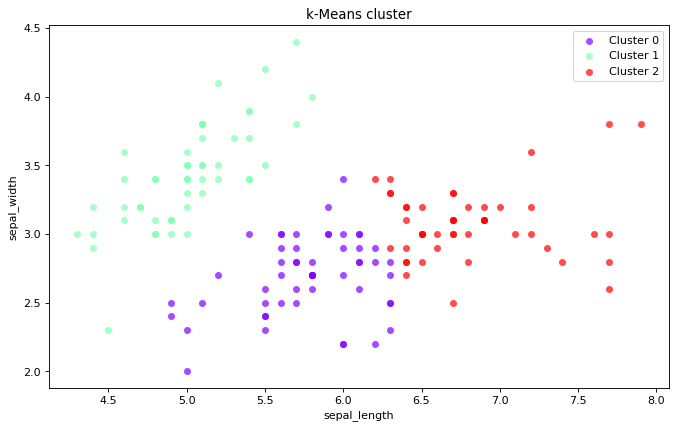

In [7]:
train_plot_kmeans(dataset[['sepal_length', 'sepal_width']])

<div style="height:20px;text-align_center"><hr/></div>

<h4>3)Training and plotting heirarchical model for sepal length and sepal width</h4>

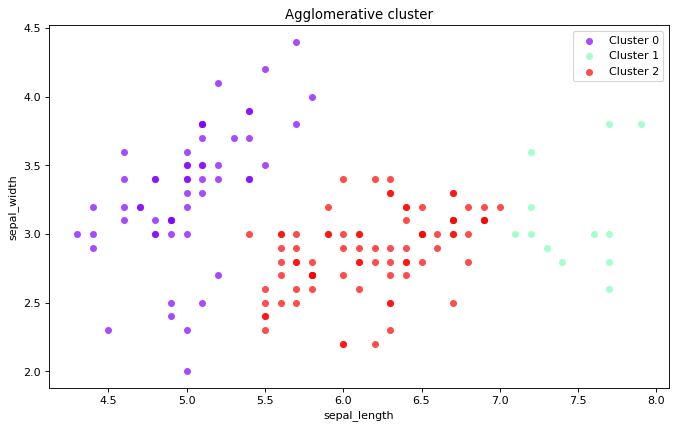

In [8]:
train_plot_agglomerative(dataset[['sepal_length', 'sepal_width']])

<div style="height:20px;text-align_center"><hr/></div>

<h4>4) Plotting petal length vs petal width</h4>

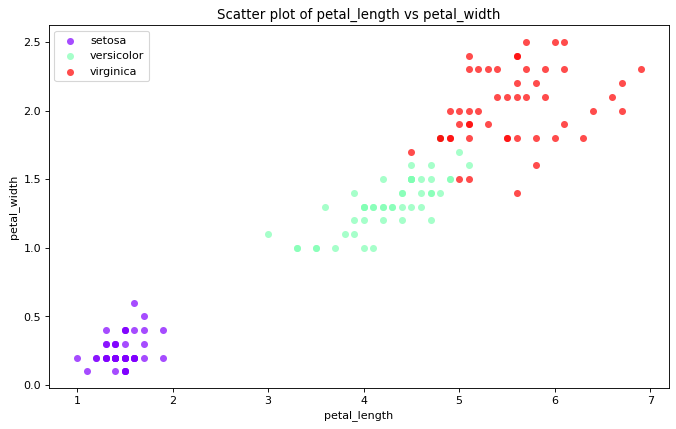

In [9]:
plot_scatter('petal_length', 'petal_width')

<div style="height:20px;text-align_center"><hr/></div>

<h4>Training and plotting k-Means model for petal length and petal width</h4>

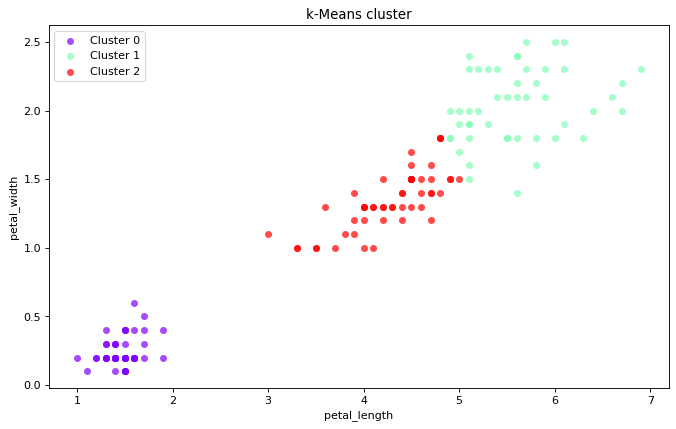

In [10]:
train_plot_kmeans(dataset[['petal_length', 'petal_width']])

<div style="height:20px;text-align_center"><hr/></div>

<h4>Training and plotting heirarchical model for petal length and petal width</h4>

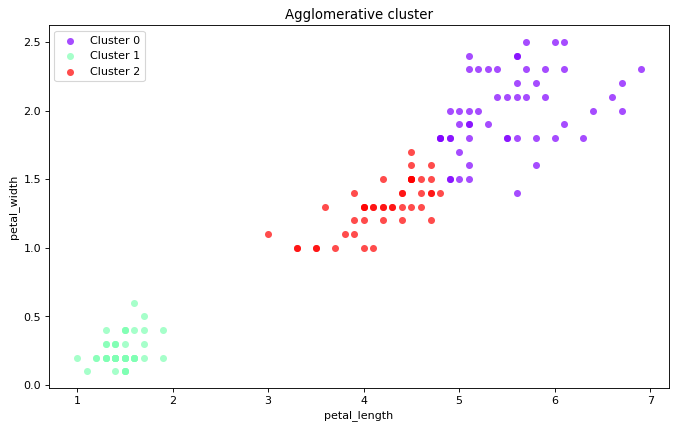

In [11]:
train_plot_agglomerative(dataset[['petal_length', 'petal_width']])

<div style="height:20px;text-align_center"><hr/></div>

<p>5) Visually petal length and petal width look more convenient for clustering</p>

<div style="height:20px;text-align_center"><hr/></div>